In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None) # displays all columns in dfs

import warnings
warnings.filterwarnings('ignore') # no more warnings 

### Show the dataframe shape

In [4]:
# Reading data into a DataFrame
file = pd.read_csv('marketing_customer_analysis.csv')
file.shape

(10910, 26)

### Standardize header names

In [5]:
file.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [6]:
file.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [7]:
# rename column name
file = file.rename(columns={'EmploymentStatus':'Employment Status'})
file.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [8]:
cols = []
for column in file.columns:
    cols.append(column.lower())
file.columns = cols

file.head()

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


### Delete unwanted column

In [9]:
file = file.drop(['unnamed: 0'], axis=1)
file.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


### Which columns are numerical?

In [10]:
file.dtypes

customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employment status                 object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim          float64
months since policy inception      int64
number of open complaints        float64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size                      object
vehicle type    

In [11]:
file._get_numeric_data().head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645


### Which columns are categorical?

In [12]:
file.select_dtypes(object).head()

,customer,state,response,coverage,education,effective to date,employment status,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN


### Check and deal with NaN values

In [13]:
file.isna().sum()

customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employment status                   0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

In [14]:
file[file['state'].isna() & file['response'].isna()]

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
5,HO81102,NaN,4745.181764,NaN,Basic,High School or Below,2/14/11,Employed,M,50549,Suburban,Divorced,61,2.0,73,0.0,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A
11,GE63585,NaN,2420.711888,NaN,Basic,Bachelor,2/7/11,Employed,M,31710,Urban,Divorced,62,5.0,29,0.0,1,Corporate Auto,Corporate L3,Offer1,Call Center,199.551735,Two-Door Car,Medsize,NaN
58,BR69566,NaN,14019.833140,NaN,Basic,College,2/18/11,Employed,M,31739,Suburban,Divorced,71,10.0,29,0.0,2,Personal Auto,Personal L3,Offer4,Call Center,469.882367,Two-Door Car,Small,NaN
62,UF44021,NaN,2108.493744,NaN,Basic,Bachelor,1/2/11,Unemployed,M,0,Suburban,Single,61,8.0,91,0.0,1,Personal Auto,Personal L2,Offer1,Agent,351.856810,Two-Door Car,Medsize,NaN
126,TE60343,NaN,4716.264294,NaN,Basic,High School or Below,2/25/11,Employed,M,25746,Suburban,Married,61,0.0,84,1.0,3,Corporate Auto,Corporate L3,Offer2,Agent,292.800000,Four-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10837,IJ40048,NaN,4978.950257,NaN,Basic,Bachelor,1/31/11,Employed,M,28695,Urban,Single,64,17.0,87,0.0,4,Corporate Auto,Corporate L2,Offer1,Branch,221.241837,Four-Door Car,Medsize,A
10849,SO38188,NaN,5308.617246,NaN,Extended,Bachelor,1/24/11,Employed,M,40178,Suburban,Married,136,7.0,13,0.0,1,Special Auto,Special L2,Offer1,Agent,652.800000,SUV,Medsize,NaN
10874,PD52748,NaN,10036.536340,NaN,Extended,High School or Below,2/12/11,Unemployed,F,0,Suburban,Single,134,15.0,92,1.0,8,Personal Auto,Personal L3,Offer1,Call Center,1353.289060,SUV,Medsize,NaN
10894,EX63393,NaN,6314.492009,NaN,Extended,Master,2/27/11,Employed,F,66947,Suburban,Married,78,13.0,12,0.0,6,Personal Auto,Personal L1,Offer3,Agent,374.400000,Four-Door Car,Small,NaN


After inspecting the missing values in column "state", we noticed that each rows also contain missing values in column "response". This might implies that the missing values in column "state" is due to the fact that customers do not respond. 

In [15]:
file['state'] = file['state'].fillna("Unknown")
file['response'] = file['response'].fillna("No")

In [16]:
file[file['months since last claim'].isna() & file['number of open complaints'].isna()]

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
23,NQ71171,California,5107.071054,No,Basic,Bachelor,2/2/11,Employed,M,70174,Rural,Married,64,NaN,80,NaN,7,Personal Auto,Personal L2,Offer1,Agent,128.900320,Four-Door Car,Medsize,NaN
51,FT56968,Arizona,2590.096027,No,Basic,High School or Below,1/3/11,Employed,M,22398,Suburban,Married,67,NaN,76,NaN,1,Personal Auto,Personal L1,Offer1,Agent,321.600000,Four-Door Car,Large,A
59,EP83939,Arizona,5575.751228,No,Basic,High School or Below,1/26/11,Employed,M,91416,Rural,Married,69,NaN,39,NaN,5,Personal Auto,Personal L3,Offer2,Call Center,109.904496,Four-Door Car,Medsize,NaN
67,KR35099,Washington,7507.455372,Yes,Basic,College,2/6/11,Employed,M,60920,Urban,Single,64,NaN,61,NaN,2,Personal Auto,Personal L3,Offer2,Agent,231.201886,Two-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10801,AP56340,Washington,5384.671725,No,Basic,Bachelor,2/26/11,Disabled,M,13103,Suburban,Married,72,NaN,32,NaN,7,Personal Auto,Personal L2,Offer1,Agent,458.003651,Four-Door Car,Medsize,A
10816,AW71157,California,5531.723723,No,Basic,College,1/16/11,Employed,M,50097,Rural,Divorced,71,NaN,81,NaN,5,Personal Auto,Personal L1,Offer3,Web,17.484679,Four-Door Car,Medsize,A
10833,OQ99704,Washington,3981.775889,No,Basic,Bachelor,2/11/11,Employed,F,52801,Urban,Married,100,NaN,78,NaN,1,Personal Auto,Personal L3,Offer2,Branch,475.200880,SUV,Small,A
10834,FU99476,Washington,6770.306834,No,Extended,High School or Below,2/22/11,Employed,M,74422,Rural,Divorced,85,NaN,3,NaN,3,Personal Auto,Personal L1,Offer1,Call Center,95.338505,Four-Door Car,Medsize,A


In [17]:
file['months since last claim'] = file['months since last claim'].fillna(0.0)
file['number of open complaints'] = file['number of open complaints'].fillna(0.0)

In [18]:
file[file['vehicle class'].isna() & file['vehicle size'].isna()]

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
87,ZH92587,Oregon,8126.766397,No,Basic,College,2/22/11,Disabled,F,14616,Suburban,Married,107,0.0,73,0.0,3,Personal Auto,Personal L3,Offer1,Agent,513.600000,NaN,NaN,NaN
88,CJ51511,Arizona,13466.920710,Yes,Basic,High School or Below,2/23/11,Disabled,F,11432,Suburban,Married,119,0.0,9,0.0,2,Corporate Auto,Corporate L3,Offer2,Agent,571.200000,NaN,NaN,NaN
89,ME37450,Arizona,5210.348372,No,Basic,Bachelor,1/4/11,Employed,M,89781,Rural,Single,66,7.0,89,0.0,5,Special Auto,Special L2,Offer1,Agent,37.960537,NaN,NaN,A
97,CA22248,Oregon,2505.420430,No,Basic,Master,2/14/11,Employed,F,60546,Rural,Single,63,21.0,71,0.0,1,Personal Auto,Personal L3,Offer2,Branch,46.278027,NaN,NaN,A
148,HB24005,California,2347.048112,No,Basic,College,2/2/11,Employed,M,31617,Urban,Single,62,17.0,29,1.0,1,Personal Auto,Personal L1,Offer1,Agent,244.269407,NaN,NaN,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10852,KZ80424,Washington,8382.478392,Yes,Basic,Bachelor,1/27/11,Employed,M,25998,Suburban,Married,71,16.0,38,0.0,2,Personal Auto,Personal L2,Offer2,Call Center,791.878042,NaN,NaN,A
10860,GA79817,Arizona,2369.111588,No,Basic,Bachelor,2/5/11,Unemployed,M,0,Suburban,Single,65,8.0,91,0.0,1,Corporate Auto,Corporate L2,Offer3,Call Center,468.000000,NaN,NaN,NaN
10879,FK95213,California,18611.453560,No,Extended,Master,1/16/11,Employed,F,49673,Urban,Married,232,27.0,57,0.0,7,Personal Auto,Personal L3,Offer2,Web,1021.654003,NaN,NaN,NaN
10883,FD64348,Oregon,22563.618380,No,Basic,High School or Below,1/17/11,Employed,M,23046,Rural,Married,65,18.0,7,3.0,2,Personal Auto,Personal L3,Offer4,Branch,1.687291,NaN,NaN,A


In [19]:
file['vehicle class'] = file['vehicle class'].fillna('unknown')
file['vehicle size'] = file['vehicle size'].fillna('unknown')

In [20]:
file[file['vehicle type'].isna()]

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,0.0,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
6,IW72280,California,5035.035257,No,Basic,Doctor,2/14/11,Employed,F,37405,Urban,Married,63,8.0,99,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,NaN
7,IH64929,California,4956.247235,No,Basic,High School or Below,2/24/11,Employed,M,87197,Urban,Single,63,35.0,45,0.0,3,Personal Auto,Personal L2,Offer2,Branch,247.402353,Two-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10898,SO95845,California,5807.659307,No,Basic,College,1/7/11,Employed,F,62447,Rural,Single,74,9.0,2,0.0,7,Personal Auto,Personal L3,Offer4,Call Center,133.977857,Two-Door Car,Medsize,NaN
10900,VN73653,Oregon,6423.739052,No,Basic,College,2/13/11,Unemployed,M,0,Suburban,Single,188,5.0,67,0.0,1,Corporate Auto,Corporate L2,Offer3,Agent,1621.560425,Luxury SUV,Medsize,NaN
10901,RY92254,Washington,4547.892543,No,Premium,Bachelor,1/13/11,Employed,M,33531,Suburban,Married,116,11.0,15,0.0,1,Personal Auto,Personal L3,Offer4,Agent,801.577478,Two-Door Car,Medsize,NaN
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN


In [21]:
file['vehicle type'] = file['vehicle type'].fillna('unknown')

In [22]:
file.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employment status                0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
vehicle type                     0
dtype: int64

In [23]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10910 non-null  object 
 1   state                          10910 non-null  object 
 2   customer lifetime value        10910 non-null  float64
 3   response                       10910 non-null  object 
 4   coverage                       10910 non-null  object 
 5   education                      10910 non-null  object 
 6   effective to date              10910 non-null  object 
 7   employment status              10910 non-null  object 
 8   gender                         10910 non-null  object 
 9   income                         10910 non-null  int64  
 10  location code                  10910 non-null  object 
 11  marital status                 10910 non-null  object 
 12  monthly premium auto           10910 non-null 

### Change column to datetime format

In [24]:
file['effective to date'] = pd.to_datetime(file['effective to date'], errors='coerce')
file.dtypes

customer                                 object
state                                    object
customer lifetime value                 float64
response                                 object
coverage                                 object
education                                object
effective to date                datetime64[ns]
employment status                        object
gender                                   object
income                                    int64
location code                            object
marital status                           object
monthly premium auto                      int64
months since last claim                 float64
months since policy inception             int64
number of open complaints               float64
number of policies                        int64
policy type                              object
policy                                   object
renew offer type                         object
sales channel                           

In [25]:
display(file['effective to date'].max())
display(file['effective to date'].min())

Timestamp('2011-02-28 00:00:00')

Timestamp('2011-01-01 00:00:00')

In [26]:
file['month'] = file['effective to date'].dt.to_period('M')
file.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,unknown,2011-02
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,unknown,2011-01
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2011-02
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,2011-01
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,Married,117,0.0,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,unknown,2011-01


### Filter out data for first quarter (January, February and March)

In [27]:
file[(file['month'] >= '2011-01') & (file['month'] <= '2011-03')]

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,unknown,2011-02
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,unknown,2011-01
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2011-02
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,2011-01
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,Married,117,0.0,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,unknown,2011-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,Suburban,Married,253,0.0,40,0.0,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,2011-01
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,2011-01
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,unknown,2011-02
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2011-02


### Round 3

### Show DataFrame info

In [28]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       10910 non-null  object        
 1   state                          10910 non-null  object        
 2   customer lifetime value        10910 non-null  float64       
 3   response                       10910 non-null  object        
 4   coverage                       10910 non-null  object        
 5   education                      10910 non-null  object        
 6   effective to date              10910 non-null  datetime64[ns]
 7   employment status              10910 non-null  object        
 8   gender                         10910 non-null  object        
 9   income                         10910 non-null  int64         
 10  location code                  10910 non-null  object        
 11  marital status 

### Describe DataFrame

In [29]:
file.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,8018.241094,37536.284785,93.196059,14.270119,48.091934,0.361962,2.979193,434.888330
std,6885.081434,30359.195670,34.442532,10.404862,27.940675,0.890134,2.399359,292.180556
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,4014.453113,0.000000,68.000000,5.000000,24.000000,0.000000,1.000000,271.082527
50%,5771.147235,33813.500000,83.000000,13.000000,48.000000,0.000000,2.000000,382.564630
75%,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


### Show a plot of the total number of responses.


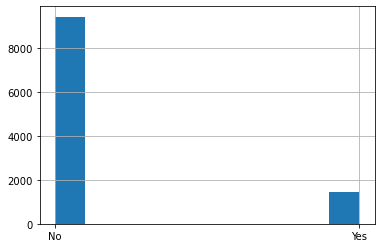

In [30]:
file['response'].hist()
plt.show()

### Show a plot of the response rate by the sales channel

<AxesSubplot:xlabel='sales channel', ylabel='count'>

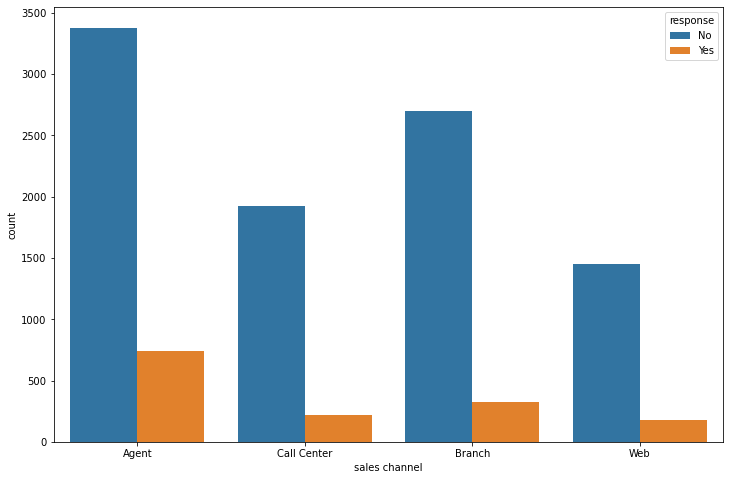

In [31]:
plt.figure(figsize=(12,8))
sns.countplot('sales channel', hue='response', data=file)

### Show a plot of the response rate by the total claim amount

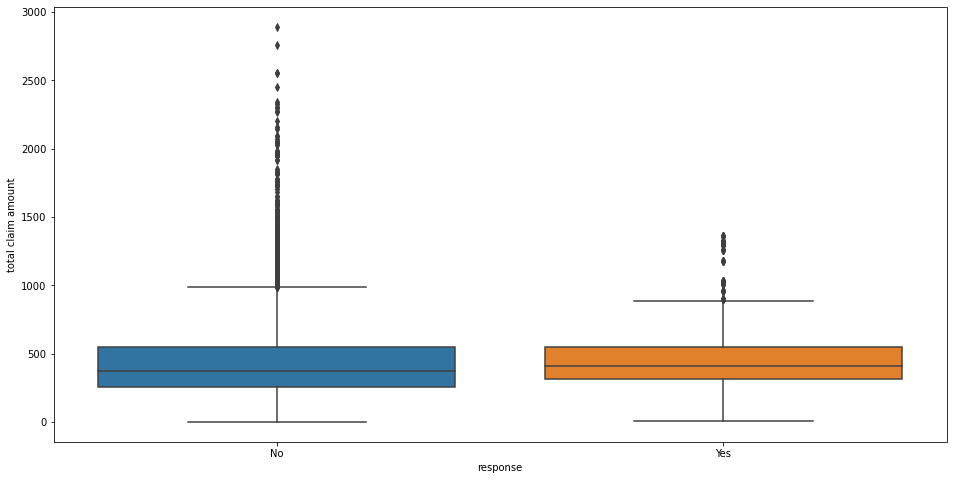

In [32]:
plt.figure(figsize=(16,8))
sns.boxplot(x='response', y='total claim amount', data=file)
plt.show()

### Show a plot of the response rate by income

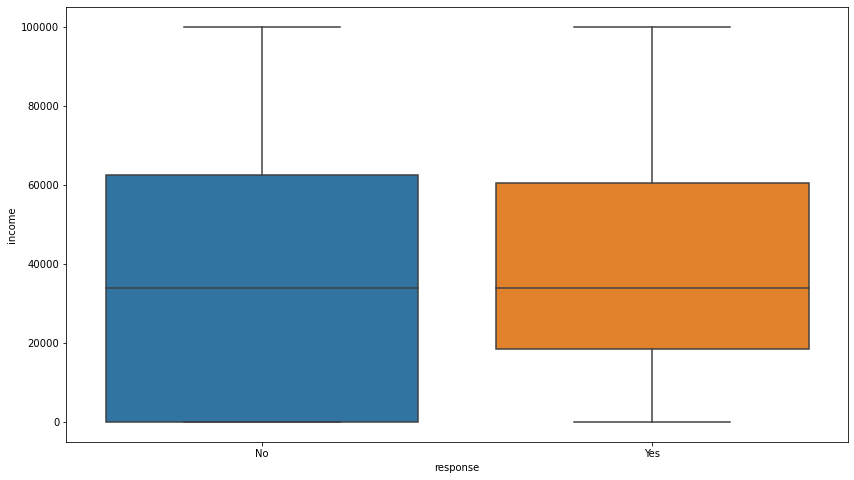

In [33]:
plt.figure(figsize=(14,8))
sns.boxplot(x='response', y='income', data=file)
plt.show()

## Round 4

 ### check data types

In [34]:
file.dtypes

customer                                 object
state                                    object
customer lifetime value                 float64
response                                 object
coverage                                 object
education                                object
effective to date                datetime64[ns]
employment status                        object
gender                                   object
income                                    int64
location code                            object
marital status                           object
monthly premium auto                      int64
months since last claim                 float64
months since policy inception             int64
number of open complaints               float64
number of policies                        int64
policy type                              object
policy                                   object
renew offer type                         object
sales channel                           

### Extract numeric data

In [35]:
numerical = file._get_numeric_data().head()
numerical.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,0.0,31,0.0,7,707.925645


### Extract categorical data

In [36]:
categoricals = file.select_dtypes(object).head()
categoricals.head()

,customer,state,response,coverage,education,employment status,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,unknown
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,unknown
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,unknown


### Use seaborn library to construct distribution plots for the numerical variables

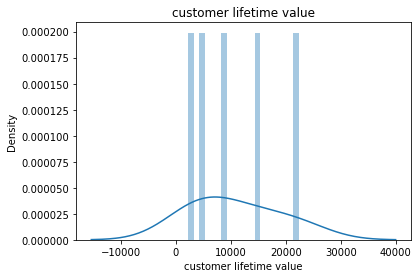

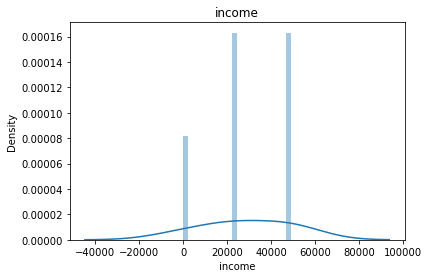

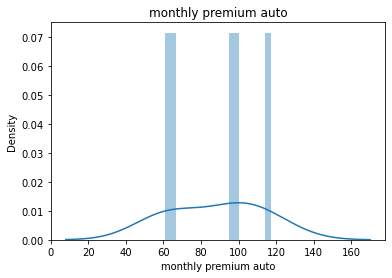

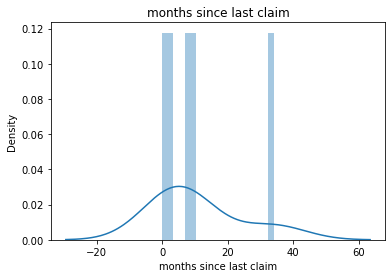

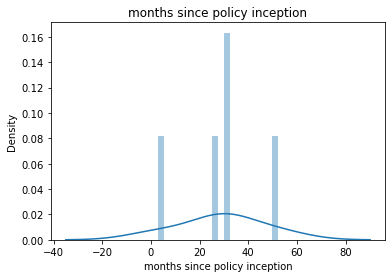

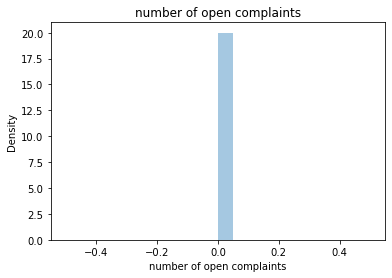

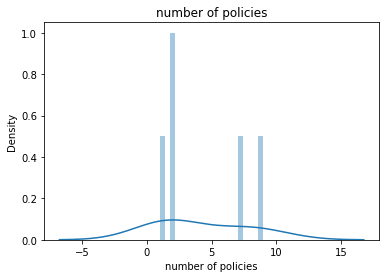

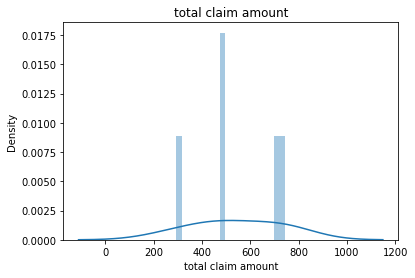

In [40]:
for column in numerical.columns:
    sns.distplot(numerical[column], bins=20)
    plt.title(column)
    plt.show()

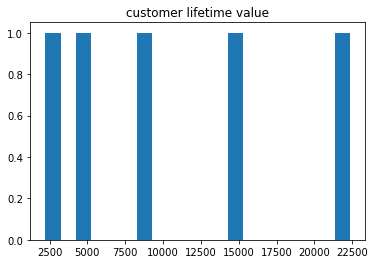

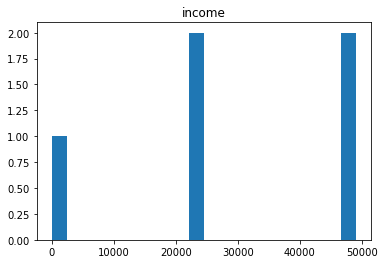

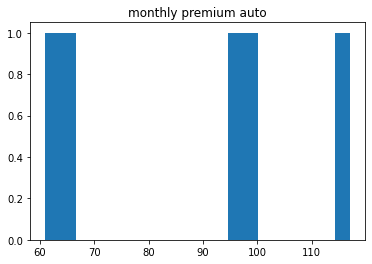

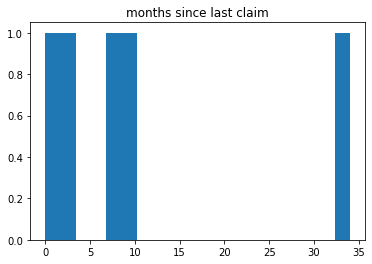

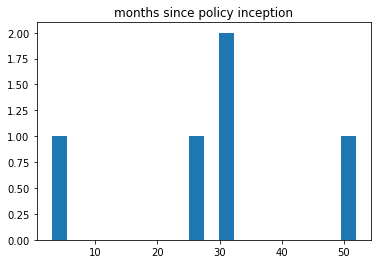

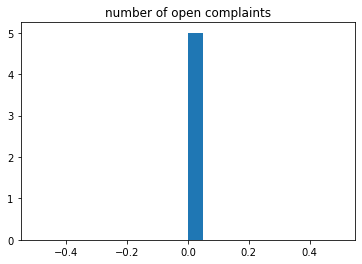

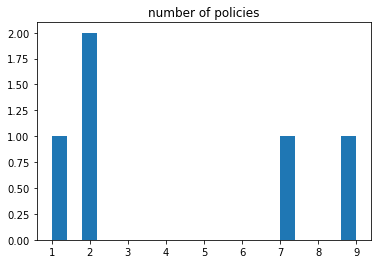

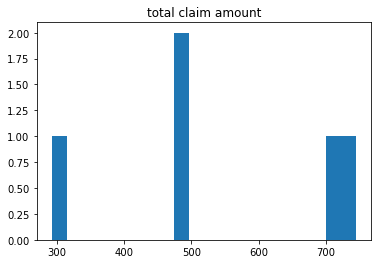

In [39]:
for column in numerical.columns:
    plt.hist(numerical[column], bins=20)
    plt.title(column)
    plt.show()

### Do the distributions for different numerical variables look like a normal distribution?

None of the distributions look like a normal distribution

### For the numerical variables, check the multicollinearity between the features

In [46]:
corr_data = numerical.drop(labels='total claim amount', axis=1)
corr_matrix =  corr_data.corr()
corr_matrix

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
customer lifetime value,1.000000,0.522042,0.594913,0.446929,-0.719440,NaN,-0.353176
income,0.522042,1.000000,0.062993,0.032629,-0.015750,NaN,0.479634
monthly premium auto,0.594913,0.062993,1.000000,0.188258,-0.412216,NaN,-0.051291
months since last claim,0.446929,0.032629,0.188258,1.000000,-0.019477,NaN,-0.377833
months since policy inception,-0.719440,-0.015750,-0.412216,-0.019477,1.000000,NaN,0.716258
number of open complaints,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number of policies,-0.353176,0.479634,-0.051291,-0.377833,0.716258,NaN,1.000000


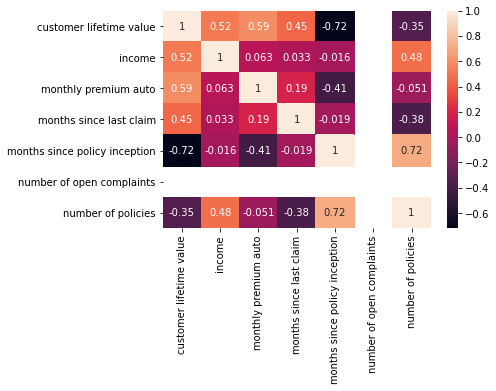

In [47]:
sns_plot = sns.heatmap(corr_matrix, annot=True)
figure = sns_plot.get_figure()
plt.show()

### Drop one of the two features that show a high correlation between them (greater than 0.9)

There is no pair of features that have a high correlation